1.

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

note: this line is for the windows graphviz package to be properly excuted by the python package

a)

In [86]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.tree import export_graphviz
import graphviz

In [6]:
data = pd.read_csv('biden.csv')
data = data.dropna()

In [13]:
y = data.iloc[:,0].values
X = data.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state=25)

In [14]:
biden_tree1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

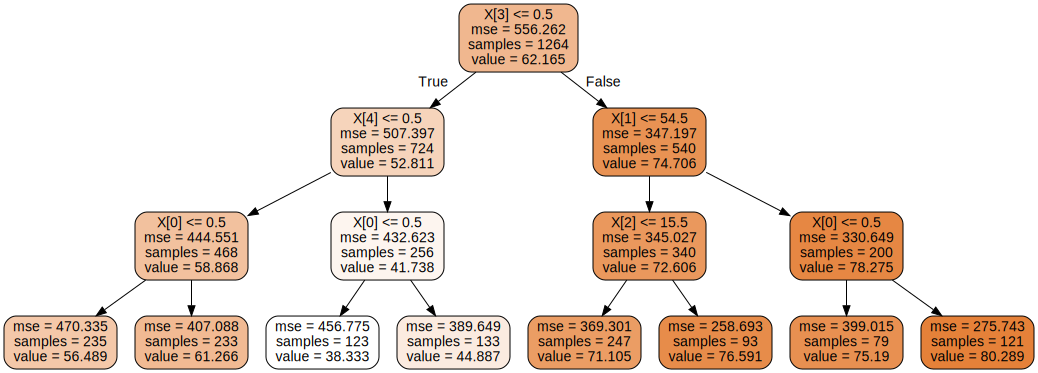

In [26]:
biden_tree_viz1 = export_graphviz(
    biden_tree1,
    out_file=None,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz1)
graph.render('biden_tree_viz1')
graph

In [34]:
y_pred = biden_tree1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE1=', MSE1)

MSE1= 396.1937146321307


b)

In [31]:
from scipy.stats import randint as sp_randint

param_dist1 = {'max_depth': sp_randint(3, 10),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

In [32]:
biden_tree2 = DecisionTreeRegressor()
random_search1 = \
    RandomizedSearchCV(biden_tree2, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [35]:
random_search1.fit(X, y)
print('RandBestEstimator2=', random_search1.best_estimator_)
print('RandBestParams2=', random_search1.best_params_)
print('MSE2=', -random_search1.best_score_)

RandBestEstimator2= DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=18, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
RandBestParams2= {'max_depth': 3, 'min_samples_leaf': 18, 'min_samples_split': 5}
MSE2= 401.713307249986


c)

In [38]:
from sklearn.ensemble import RandomForestRegressor

param_dist2 = {'n_estimators': [10, 200],
               'max_depth': sp_randint(3, 10),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1,5)}

In [39]:
biden_tree3 = RandomForestRegressor()
random_search2 = \
    RandomizedSearchCV(biden_tree3, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [40]:
random_search2.fit(X, y)
print('RandBestEstimator3=', random_search2.best_estimator_)
print('RandBestParams3=', random_search2.best_params_)
print('MSE3=', -random_search2.best_score_)

RandBestEstimator3= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=17,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RandBestParams3= {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 17, 'min_samples_split': 12, 'n_estimators': 200}
MSE3= 397.52209202031827


2.

In [78]:
data2 = pd.read_csv('Auto.csv', na_values='?')
data2 = data2.dropna()

a)

In [79]:
from statistics import median

df = data2.iloc[:, :-1]
mpg_med = median(df['mpg'])

df['org1'] = df['origin'] == 1
df['org2'] = df['origin'] == 2
df['mpg_high'] = df['mpg'] >= mpg_med
df = df.replace(True, 1)
df = df.replace(False, 0)

df['horsepower'] = df['horsepower'].astype(float)

In [81]:
X1vars = df.iloc[:, [1, 2, 3, 4, 5, 6, 8, 9]].values
y1vars = df.iloc[:, -1].values

In [82]:
k = 4
kf = KFold(n_splits=k, random_state=25, shuffle=True)
kf.get_n_splits(X1vars)

MSE1_vec_kf = np.zeros(k)

In [88]:
k_ind = int(0)
for train_index, test_index in kf.split(X1vars):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X1_train, X1_test = X1vars[train_index], X1vars[test_index]
    y1_train, y1_test = y1vars[train_index], y1vars[test_index]
    LogReg = LogisticRegression(max_iter=300)
    LogReg.fit(X1_train, y1_train)
    y1_pred = LogReg.predict(X1_test)
    MSE1_vec_kf[k_ind] = ((y1_test - y1_pred) ** 2).mean()
    print(classification_report(y1_test, y1_pred))
    print('MSE for test set', k_ind, ' is', MSE1_vec_kf[k_ind])
    k_ind += 1

MSE1_kf = MSE1_vec_kf.mean()
MSE1_kf_std = MSE1_vec_kf.std()
print('test estimate MSE k-fold=', MSE1_kf, 'test estimate MSE standard err=', MSE1_kf_std)

k index= 0
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        43
         1.0       0.87      0.87      0.87        55

    accuracy                           0.86        98
   macro avg       0.85      0.85      0.85        98
weighted avg       0.86      0.86      0.86        98

MSE for test set 0  is 0.14285714285714285
k index= 1
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        57
         1.0       0.86      0.93      0.89        41

    accuracy                           0.91        98
   macro avg       0.90      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

MSE for test set 1  is 0.09183673469387756
k index= 2
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        52
         1.0       0.90      0.96      0.93        46

    accuracy                           0.93        98
   macro 

c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


c)

In [89]:
param_dist3 = {'n_estimators': [10, 200],
               'max_depth': sp_randint(3, 8),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}

In [90]:
auto_tree = RandomForestRegressor()
random_search3 = \
    RandomizedSearchCV(auto_tree, param_distributions=param_dist3,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

In [101]:
random_search3.fit(X1vars, y1vars)
print('rtreeRandBestEstimator=', random_search3.best_estimator_)
print('rtreeRandBestParams=', random_search3.best_params_)
print('rtree_MSE=', -random_search3.best_score_)

rtreeRandBestEstimator= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rtreeRandBestParams= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 10}
rtree_MSE= 0.0896020211707416


c)

In [94]:
from sklearn import svm, datasets
from scipy.stats import uniform as sp_uniform

In [96]:
param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

In [98]:
auto_svm = svm.SVC(kernel='rbf')
random_search4 = \
    RandomizedSearchCV(auto_svm, param_distributions=param_dist4,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

In [102]:
random_search4.fit(X1vars, y1vars)
print('svmRandBestEstimator=', random_search4.best_estimator_)
print('svmRandBestParams=', random_search4.best_params_)
print('svm_MSE=', -random_search4.best_score_)

svmRandBestEstimator= SVC(C=1.8094629152568114, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=False, tol=0.001, verbose=False)
svmRandBestParams= {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
svm_MSE= 0.11989795918367346


d)

Based on the MSE results of the three models, one should conclude that the random forest model, with the smallest MSE among the three, yields the best prediction results for the $mpg\_high$ variable.